<a href="https://colab.research.google.com/github/vatsal-create/SPARKS/blob/main/SPARKS_INTERNSHIP_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE NECESSARY LIBRARIES**

THE LIBRARIES REQUIRED FOR THIS TASK HAVE BEEN IMPORTED IN THE CELL BELOW. THESE LIBRARIRES ARE NUMPY, MATPLOTLIB,PANDAS AND SCIKIT-LEARN

AUTHOR: VATSAL OJHA, 2ND YEAR CSE UNDEGRAD AT IIT(ISM) DHANBAD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**READING THE DATA**

THE REQUIRED DATA IS IN A REMOTE LOACTION.IN ORDER TO READ THE DATA FROM THAT LOACTION INTO A CSV FILE I HAVE USED THE READ_CSV FUNCTION WITH THE URL AS ITS INPUT. THE DATA VARIABLE NOW CONTAINS THE ENTIRE DATA

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**EXTRACTING THE REQUIRED IMFORMATION FROM THE DATA**

NOW THAT I HAVE PREPARED A DATASET CONTAINING THE COLUMNS OF HOURS AND SCORES I NEED TO CREATE SEPARATE NUMPY ARRAYS FOR FEATURES AND VALUES RESPECTIVELY.THE LINEAR REGRESSION I ATTEMPT TO CREATE LATER WOULD REQUIRE THESE.I HAVE ALSO CREATED A VERY SMALL TEST SET CONTAING ONLY THE LAST TWO ROWS OF THE DATASET.THE REASON FOR A VERY SMALL TEST SET IS THAT THE DATASET ITSELF IS QUITE SMALL AND HENCE I MUST PROVIDE MAXIMUM DATA FOR TRAINING THE MODEL SO AS TO HAVE BETTER RESULTS.

In [ ]:
x=data["Hours"]
y=data["Scores"]
x=x.to_numpy() #CONVERTING THE SERIES OBJECT INTO A NUMPY ARRAY 
x=x.reshape((-1,1)) #RESHAPING THE NUMPY ARRAY TO BE OF THE FORM(N,1) INSTEAD OF THE FORM(N,)
y=y.to_numpy() #CONVERTING THE SERIES OBJECT INTO A NUMPY ARRAY
x_train=x[:23] #THE TRAINING FEATURES
y_train=y[:23] #CORRESPONDING CORRECT RESULTS FOR TRAINING
print(x.shape)
print(y.shape)
print(x_train)
print(y_train)

(25, 1)
(25,)
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35]


**PLOTTING THE GIVEN DATASET**

IN ORDER TO HAVE A BETTER UNDERSTANDING OF THE DATASET ONE MUST PLOT THEM.

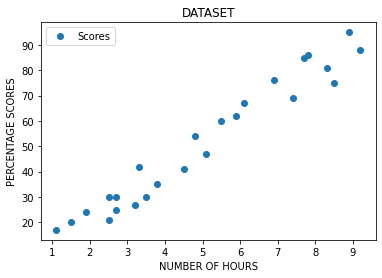

In [ ]:
data.plot(x="Hours",y="Scores",style='o')
plt.title("DATASET")
plt.ylabel("PERCENTAGE SCORES")
plt.xlabel("NUMBER OF HOURS")
plt.show()

**THE MODEL**

I HAVE USED THE LINEAR REGRESSION MODEL OF THE SKLEARN LIBRARY TRAIN THE DATA.
THE SAME COULD HAVE ALSO BEEN IMPLENTED BY CREATING A BRUTE-FORCE APPROACH FOR EACH STEP, BUT THAT WOULD HAVE BEEN TO TEDIOUS TO DO, SO I RATHER PREFERRED THE PRE-BUILD FUNCTION OF THE SCIKIT-LEARN LIBRARY

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train) #FITING THE MODEL ONTO THE TRAINING DATASET

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

THIS BEING A LINEAR REGRESSION MODEL TRAINED ON A SINGLE FEATURE, THAT IS NUMBER OF HOURS PUT IN BY A STUDENT IN HIS STUDIES , WE EXPECT TO GET A ONE-VALUE COEFF AND A ONE-VALUE INTERCEPT

In [ ]:
coef=model.coef_
intercept=model.intercept_
print("COEFFICIENT:",coef)
print("INTERCEPT:",intercept)

COEFFICIENT: [9.53129151]
INTERCEPT: 3.0799634226964585


**PLOTTING THE RESULT**

NOW THAT I HAVE FIT THE MODEL ONTO THE TRAINING DATASET, I CAN CREATE THE REGRESSION LINE USING THE SIMPLE FORMULA OF Y=MX+C. THIS REGRESSION LINE IS THEN PLOTTED ALONG WITH THE DATASET INITIALLY GIVEN. THE DOTS REPRESENT THE CORRECT ANSWER WHEREAS THE CORRESPONDING Y INTERCEPT OF A GIVEN X PRESENT THE PREDICTED VALUE.

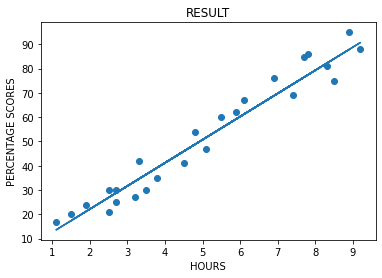

In [ ]:
line = model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x, line);
plt.title("RESULT")
plt.xlabel("HOURS")
plt.ylabel("PERCENTAGE SCORES")
plt.show()

NOW, I PRINT THE PREDICTIONS MADE ON THE TEST DATASET ALONG WITH THE ORIGINAL VALUES GIVEN FOR THEM

In [ ]:
x_test=x[23:]
y_test=y[23:]
print(type(x_test))
print(x_test.shape)
y_pred=model.predict(x_test)
print("PREDICTED VALUES:",y_pred)
print("GIVEN VALUES:",y_test)

<class 'numpy.ndarray'>
(2, 1)
PREDICTED VALUES: [68.84587486 77.42403722]
GIVEN VALUES: [76 86]


**PREDICTING FOR THE GIVEN VALUE**

AS ASKED IN THE TASK, I HAVE PREDICTED THE SCORES FOR THE VALUE OF 9.25 HOURS.THE RESULTS ARE PRESENTED BELOW

In [ ]:
test_val=9.25
test=np.array([test_val]).reshape((-1,1))
print(test.shape)
print("ANSWER:",model.predict(test))

(1, 1)
ANSWER: [91.24440991]


**MEAN ABSOLUTE ERROR**

NEXT I HAVE PRESNTED THE MEAN ABSOLUTED ERROR OF THE MODEL FOR THE ENTIRE DATA

In [ ]:
pred=model.predict(x)
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y,pred))

MEAN ABSOLUTE ERROR: 4.978516271339336
